In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["font.sans-serif"]=["SimHei"] #设置字体
plt.rcParams["axes.unicode_minus"]=False #该语句解决图像中的“-”负号的乱码问题
%matplotlib inline
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import time
import math
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold

# import os
# from sklearn.ensemble import RandomForestRegressor
# import joblib
# from torch.optim.lr_scheduler import StepLR
# from LSTM.config import Config
# from LSTM.EarlyStopping import EarlyStopping
# from LSTM.model1 import LSTM,BiLSTM

In [4]:
plt.rcParams.update({'font.size': 18})

In [5]:
data = pd.read_excel("../data/碳排放_pred.xlsx",index_col=0)
data.head()

,江西省,南昌市,景德镇市,萍乡市,九江市,新余市,鹰潭市,赣州市,吉安市,宜春市,抚州市,上饶市
2000,4019.388271,736.250475,191.548481,177.205198,619.502447,215.698632,216.631655,1078.029471,1110.368063,1202.178139,841.635627,929.563308
2001,3994.418834,733.348364,186.691805,171.298964,616.850311,217.873308,216.296654,1081.389128,1113.798678,1194.325272,849.408622,930.370928
2002,3981.503663,722.529652,190.299335,175.752485,602.164893,214.138226,215.960984,1131.087879,1126.030075,1193.239955,815.395192,919.693075
2003,3853.282343,704.345102,184.232497,165.573317,585.197343,208.793316,215.045473,1080.386473,1068.846891,1090.236335,947.578047,837.749459
2004,4259.181408,746.373703,197.918960,176.709791,621.749893,225.589485,218.799596,1176.419119,1190.452673,1141.283308,1011.753815,922.600367


In [6]:
data_score = pd.read_excel('../data/碳排放_pred.xlsx',index_col=0,sheet_name="score").iloc[:-1,:]
data_score.head()

,江西省,南昌市,景德镇市,萍乡市,九江市,新余市,鹰潭市,赣州市,吉安市,宜春市,抚州市,上饶市
2020,0.979840,0.969801,0.970386,0.957562,0.990112,0.962923,0.934751,0.974329,0.986895,0.974771,0.961227,0.988565
2021,0.984344,0.961338,0.975903,0.981500,0.984632,0.941032,0.940098,0.976926,0.987253,0.958918,0.927627,0.989732
2022,0.984419,0.972140,0.982221,0.976484,0.989546,0.972174,0.950092,0.971183,0.980172,0.976504,0.959373,0.988245
2023,0.984645,0.970486,0.976252,0.967907,0.989238,0.974277,0.967278,0.972603,0.990713,0.986242,0.959975,0.989962
2024,0.984746,0.972196,0.982419,0.970793,0.990165,0.965031,0.955663,0.973074,0.986698,0.986297,0.963914,0.988516


In [7]:
range(data.index[0],data.index[-1],5)
eng = ['Jiangxi','Nanchang','Jingdezhen','Pingxiang','Jiujiang','Xinyu','Yingtan','Ganzhou','Jian','Yichun','Fuzhou','Shangrao']

['碳', '排', '放', '量', '(', '$', '\\', 't', 'i', 'm', 'e', 's', ' ', '1', '0', '^', '{', '4', '}', ' ', 't', '$', ')']
['碳', '排', '放', '量', '(', '$', '\\', 't', 'i', 'm', 'e', 's', ' ', '1', '0', '^', '{', '4', '}', ' ', 't', '$', ')']
['碳', '排', '放', '量', '(', '$', '\\', 't', 'i', 'm', 'e', 's', ' ', '1', '0', '^', '{', '4', '}', ' ', 't', '$', ')']
['碳', '排', '放', '量', '(', '$', '\\', 't', 'i', 'm', 'e', 's', ' ', '1', '0', '^', '{', '4', '}', ' ', 't', '$', ')']
['碳', '排', '放', '量', '(', '$', '\\', 't', 'i', 'm', 'e', 's', ' ', '1', '0', '^', '{', '4', '}', ' ', 't', '$', ')']
['碳', '排', '放', '量', '(', '$', '\\', 't', 'i', 'm', 'e', 's', ' ', '1', '0', '^', '{', '4', '}', ' ', 't', '$', ')']
['碳', '排', '放', '量', '(', '$', '\\', 't', 'i', 'm', 'e', 's', ' ', '1', '0', '^', '{', '4', '}', ' ', 't', '$', ')']
['碳', '排', '放', '量', '(', '$', '\\', 't', 'i', 'm', 'e', 's', ' ', '1', '0', '^', '{', '4', '}', ' ', 't', '$', ')']
['碳', '排', '放', '量', '(', '$', '\\', 't', 'i', 'm', 'e', 's', ' 

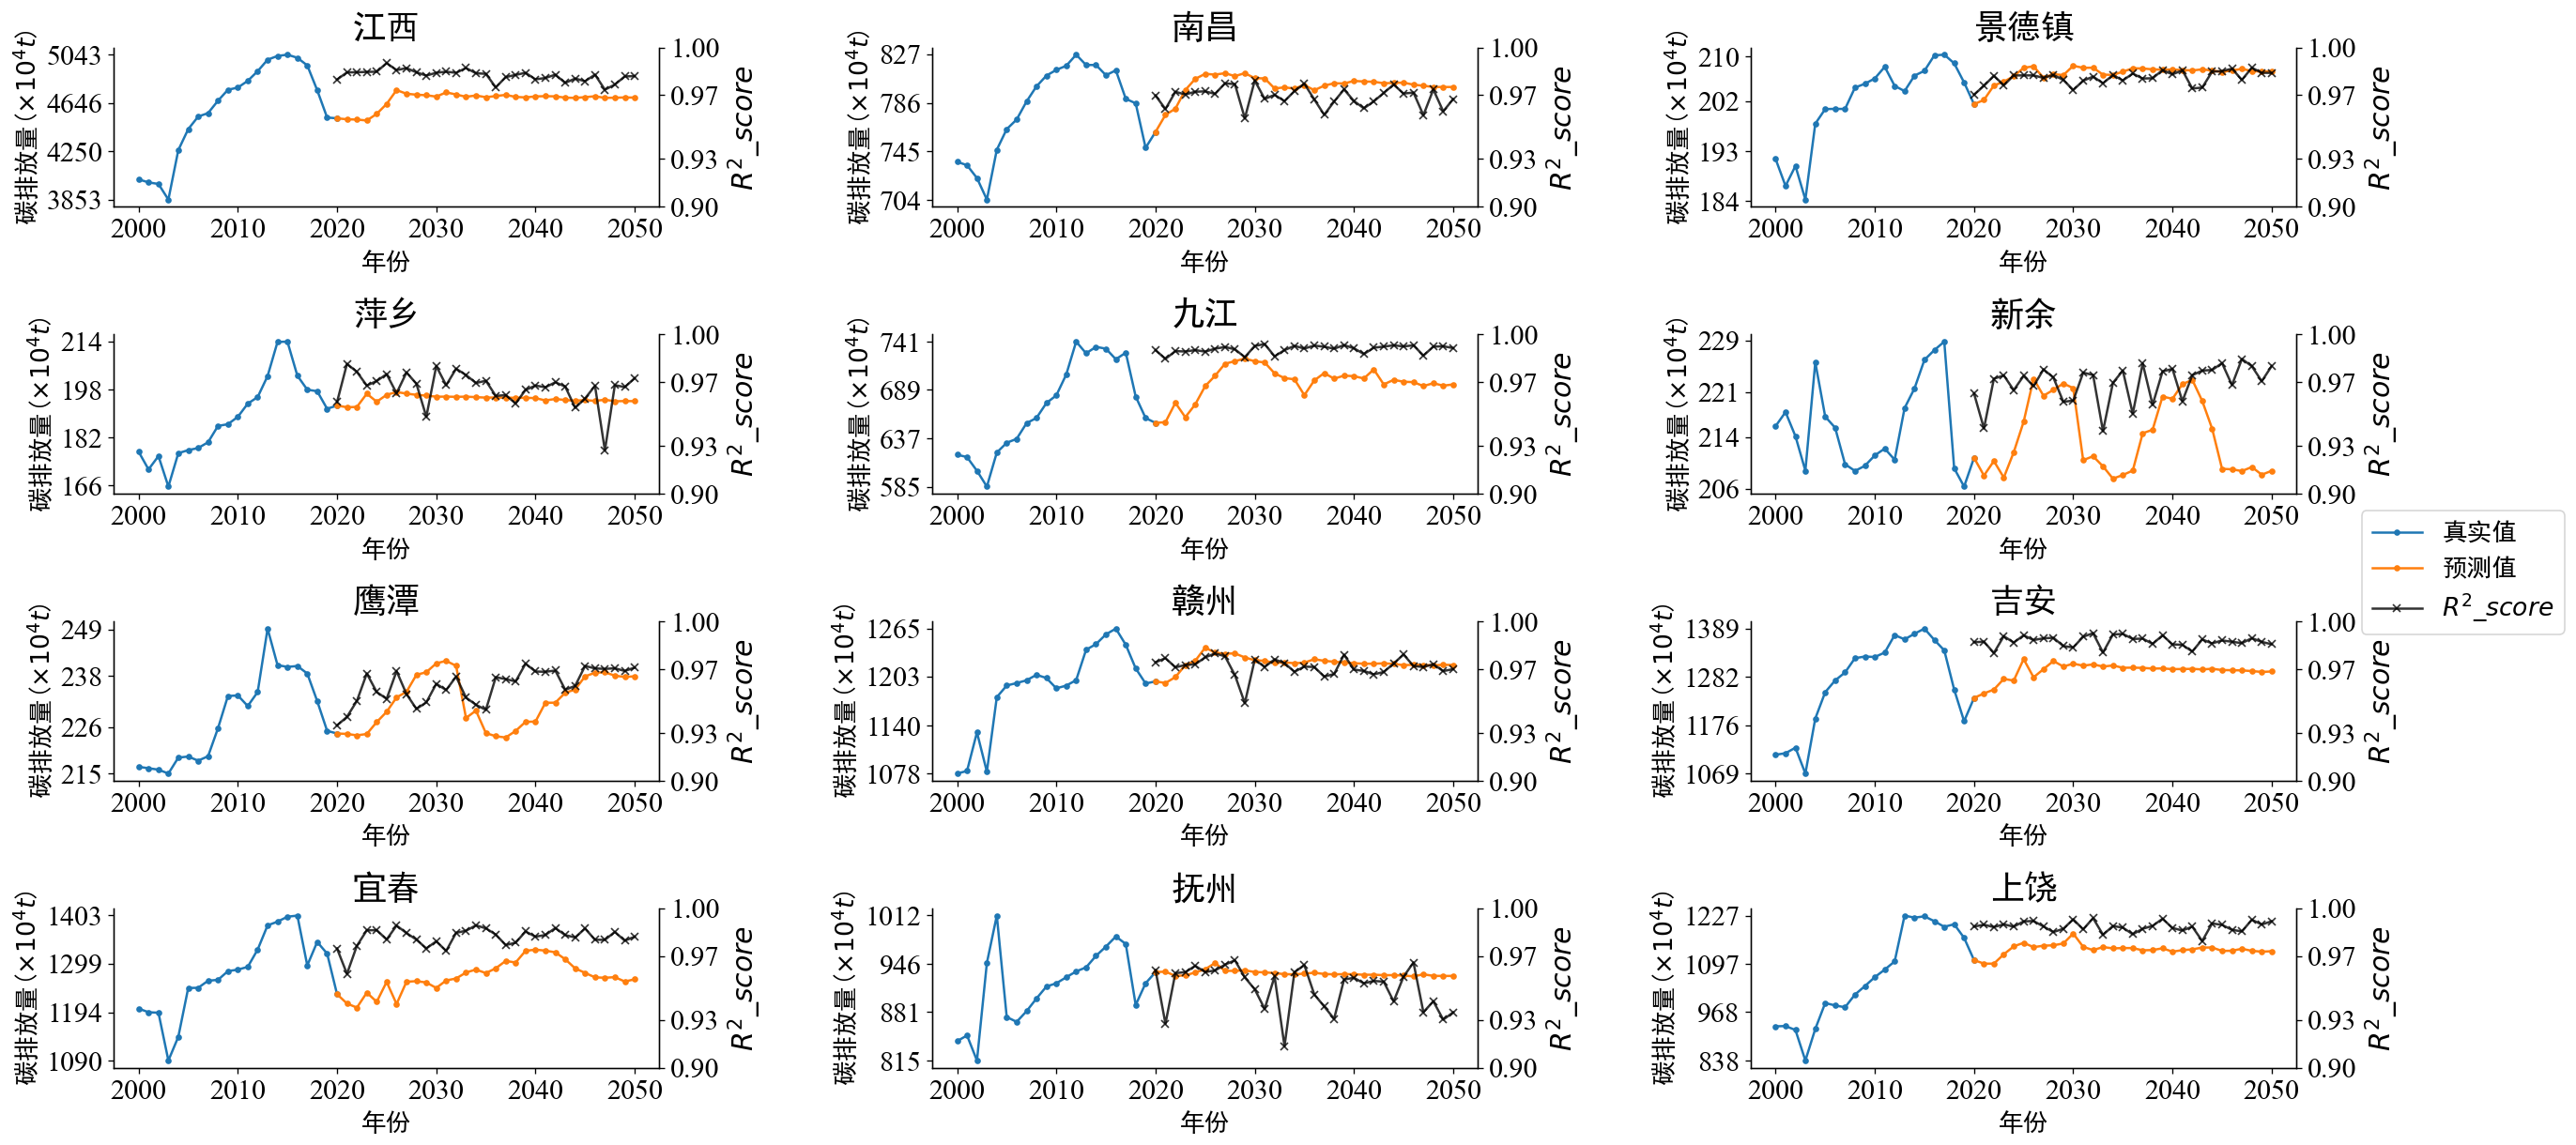

In [17]:

# plt.rc('legend', fontsize=12)
fig=plt.figure(figsize=(25,12),dpi=120)
# fig = plt.figure(dpi=120)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=0.8)
for i,col in enumerate(data.columns):
    ax = plt.subplot(4,3,i+1)
    plt.plot(data[col][:21],'.-',label="真实值" if i==10 else None)
    plt.plot(data[col][20:],'.-',label="预测值" if i==10 else None)
    plt.title(f'''{col[:-1]}''')
    plt.xticks([2000, 2010, 2020, 2030, 2040,2050])
    plt.yticks(np.round(np.linspace(data[col].values.min(),data[col].values.max(),4)))
    plt.xlabel("年份",fontsize=16)
    plt.ylabel('碳排放量($\\times 10^{4} t$)',fontsize=16)
    
    x1_label = ax.get_xticklabels() 
    [x1_label_temp.set_fontname('Times New Roman') for x1_label_temp in x1_label]
    y1_label = ax.get_yticklabels() 
    [y1_label_temp.set_fontname('Times New Roman') for y1_label_temp in y1_label]
    
    
    ax2 = ax.twinx()
    ax2.plot(data_score[col],label="$R^{2}\_score$" if i==10 else None ,marker="x",color="black",alpha=0.8,markersize=5)
    ax2.set_yticks(np.round(np.linspace(0.9,1,4),2))
    ax2.set_ylabel("$R^{2}\_score$")
    
    x1_label = ax2.get_xticklabels() 
    [x1_label_temp.set_fontname('Times New Roman') for x1_label_temp in x1_label]
    y1_label = ax2.get_yticklabels() 
    [y1_label_temp.set_fontname('Times New Roman') for y1_label_temp in y1_label]

    # plt.grid(alpha=0.6)
    for key, spine in ax.spines.items():
    # 'left', 'right', 'bottom', 'top'
        if key == 'top' :
        # or key == 'right':
            spine.set_visible(False)
    for key, spine in ax2.spines.items():
    # 'left', 'right', 'bottom', 'top'
        if key == 'top' :
        # or key == 'right':
            spine.set_visible(False)
fig.patch.set_facecolor('white')
fig.legend(loc="center right",fontsize=16)
plt.savefig('./fig/碳排放.png',bbox_inches='tight',facecolor=fig.get_facecolor())

In [9]:
# plt.figure(dpi=120)
# for i,col in enumerate(data.columns):
#     plt.plot(data[col],label=col[:-1])
#     plt.legend(loc=2, bbox_to_anchor=(1.05,1.0),borderaxespad = 0.)
#     plt.yticks(np.linspace(0.9,1,5))
#     plt.ylabel("Score")
#     plt.xlabel("年份")

# fig.patch.set_facecolor('white')
# plt.savefig('./fig/碳排放强度.png',bbox_inches='tight',facecolor=fig.get_facecolor())  

,江西省,南昌市,景德镇市,萍乡市,九江市,新余市,鹰潭市,赣州市,吉安市,宜春市,抚州市,上饶市
2020,0.979840,0.969801,0.970386,0.957562,0.990112,0.962923,0.934751,0.974329,0.986895,0.974771,0.961227,0.988565
2021,0.984344,0.961338,0.975903,0.981500,0.984632,0.941032,0.940098,0.976926,0.987253,0.958918,0.927627,0.989732
2022,0.984419,0.972140,0.982221,0.976484,0.989546,0.972174,0.950092,0.971183,0.980172,0.976504,0.959373,0.988245
2023,0.984645,0.970486,0.976252,0.967907,0.989238,0.974277,0.967278,0.972603,0.990713,0.986242,0.959975,0.989962
2024,0.984746,0.972196,0.982419,0.970793,0.990165,0.965031,0.955663,0.973074,0.986698,0.986297,0.963914,0.988516


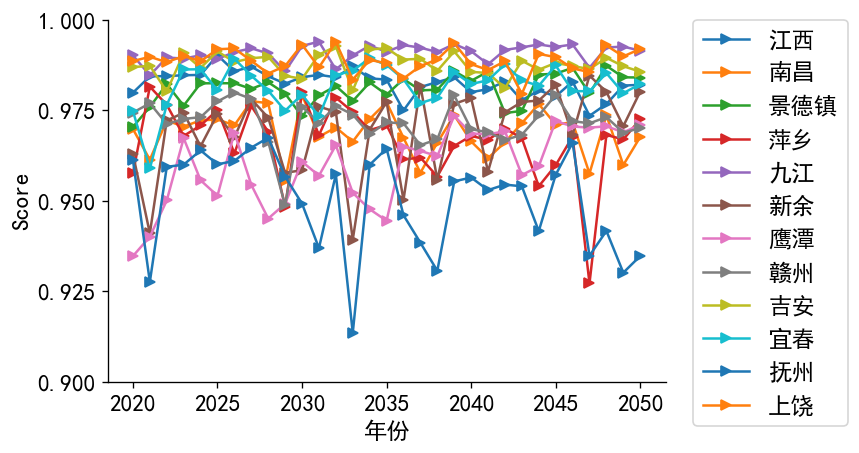

In [51]:
fig = plt.figure(dpi=120)
ax = fig.gca()
for i,col in enumerate(data.columns):
    plt.plot(data[col],label=col[:-1],marker=">")
    plt.legend(loc=2, bbox_to_anchor=(1.05,1.0),borderaxespad = 0.)
    plt.yticks(np.linspace(0.9,1,5))
    plt.ylabel("Score")
    plt.xlabel("年份")
   
fig.patch.set_facecolor('white')
for key, spine in ax.spines.items():
    # 'left', 'right', 'bottom', 'top'
        if key == 'top' or key == 'right':
            spine.set_visible(False)

plt.savefig('./fig/碳排放预测_Score.png',bbox_inches='tight',facecolor=fig.get_facecolor())  